In [1]:
import os
import sys
from datetime import datetime

# Add ../src to the path
proj_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.insert(0, proj_path)

# Import the parse config function to parse the .toml file
from utils.config_tool import parse_config
from utils.logging_tool import initialize_logger
from strategy.train_trading_agent import train_trading_agent

# Get the time
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Load the config file
config = parse_config("../config/trade_w_llm.toml")
# Initialize the logger
log_file = "{}_log_{}.txt".format(
			'training_agent',
			str(timestamp))
logger = initialize_logger(log_path=os.path.join(config['info']['local_data_path'], 'logs'),log_file=log_file)

In [2]:
from evaluation import backtest

In [3]:
mode_path = os.path.join(config['info']['local_data_path'], 'models/final_model_portfolio_20250414_222554.pth')

/Users/zxmath/Library/Caches/pypoetry/virtualenvs/erdos-finance-llm-OLSUwxnZ-py3.13/lib/python3.13/site-packages/gymnasium/envs/registration.py:644: UserWarning: WARN: Overriding environment trading-port-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/zxmath/Library/Caches/pypoetry/virtualenvs/erdos-finance-llm-OLSUwxnZ-py3.13/lib/python3.13/site-packages/gymnasium/envs/registration.py:487: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(
/Users/zxmath/Library/Caches/pypoetry/virtualenvs/erdos-finance-llm-OLSUwxnZ-py3.13/lib/python3.13/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/zxmath/Library/Caches/pypoetry/virtualenvs/erdos-finance-llm-OLSUwxnZ-py3.13/lib/python3.13/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box

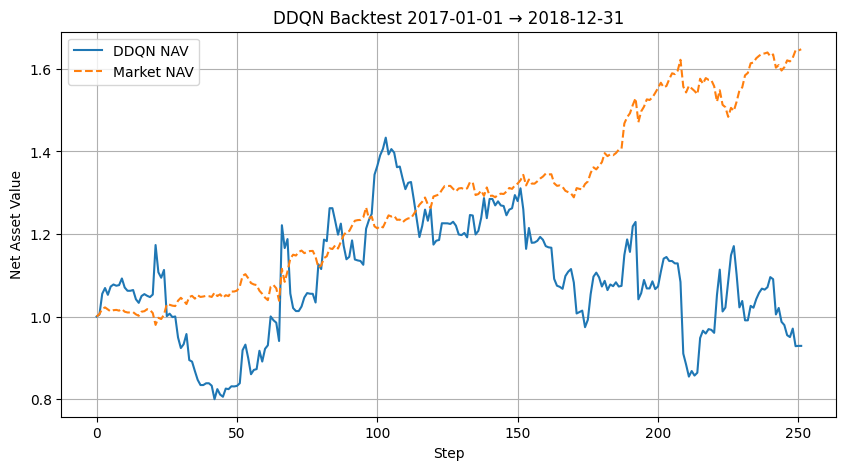

In [12]:
from gymnasium.spaces import Discrete, MultiDiscrete
from gymnasium import spaces
df,actions, navs = backtest.backtest_DDQN_agent(config=config,logger=logger, model_path=mode_path)

(          nav  market_nav  strategy_return  cost  position_0  action_0  \
 0    1.000000    1.000000        -0.046611   0.0         0.6       0.0   
 1    0.916119    0.965049        -0.083881   0.0        -1.0       6.0   
 2    0.943164    0.957927         0.029522   0.0        -0.2      10.0   
 3    0.939488    0.962594        -0.003898   0.0         0.4       9.0   
 4    0.959991    0.975724         0.021824   0.0         0.8       5.0   
 ..        ...         ...              ...   ...         ...       ...   
 247  0.438052    1.546107         0.017169   0.0         0.6       5.0   
 248  0.442097    1.552056         0.009234   0.0         1.0       3.0   
 249  0.408506    1.522574        -0.075982   0.0        -0.2       4.0   
 250  0.409799    1.516548         0.003166   0.0         1.0       4.0   
 251  0.417464    1.523640         0.018704   0.0        -1.0       3.0   
 
      trade_0  market_return_0  position_1  action_1  ...  market_return_1  \
 0        0.0       

In [6]:
  """
    plt.figure(figsize=(10,5))
    plt.plot(df.nav, label="DDQN NAV")
    plt.plot(df.market_nav, label="Market NAV", linestyle="--")
    plt.xlabel("Step")
    plt.ylabel("Net Asset Value")
    plt.title(f"DDQN Backtest {test_start} → {test_end}")
    plt.legend()
    plt.grid(True)
    plt.show()
    """

'\n  plt.figure(figsize=(10,5))\n  plt.plot(df.nav, label="DDQN NAV")\n  plt.plot(df.market_nav, label="Market NAV", linestyle="--")\n  plt.xlabel("Step")\n  plt.ylabel("Net Asset Value")\n  plt.title(f"DDQN Backtest {test_start} → {test_end}")\n  plt.legend()\n  plt.grid(True)\n  plt.show()\n  '

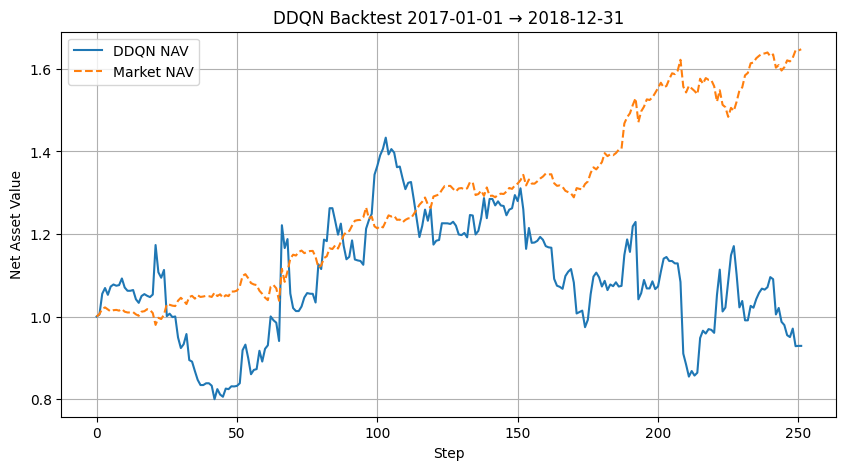

In [13]:


plt.figure(figsize=(10,5))
plt.plot(df.nav, label="DDQN NAV")
plt.plot(df.market_nav, label="Market NAV", linestyle="--")
plt.xlabel("Step")
plt.ylabel("Net Asset Value")
plt.title(f"DDQN Backtest {test_start} → {test_end}")
plt.legend()
plt.grid(True)
plt.show()

501
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/zxmath/Library/Caches/pypoetry/virtualenvs/erdos-finance-llm-OLSUwxnZ-py3.13/lib/python3.13/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/zxmath/Library/Caches/pypoetry/virtualenvs/erdos-finance-llm-OLSUwxnZ-py3.13/lib/python3.13/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


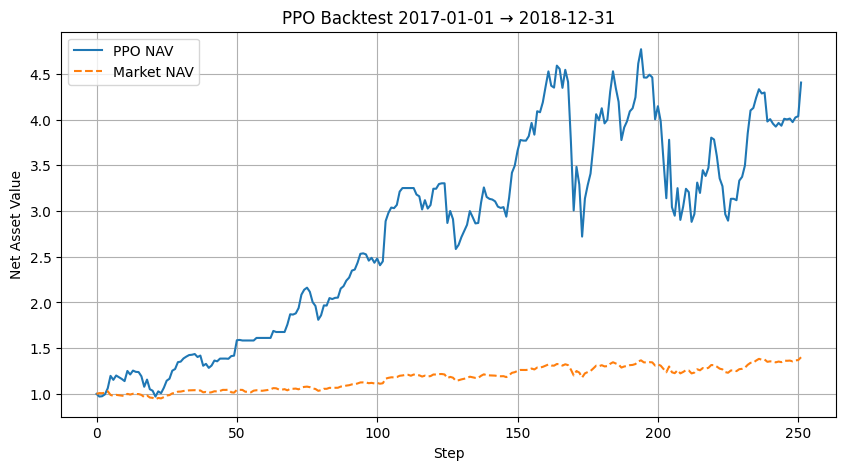

In [14]:
model_path_2 = os.path.join(config['info']['local_data_path'], 'models/ppo_trading_agent.zip')
df_2, actions, navs= backtest.backtest_PPO_agent(config=config,logger=logger, model_path=model_path_2)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df_2.nav, label="PPO NAV")
plt.plot(df_2.market_nav, label="Market NAV", linestyle="--")
plt.xlabel("Step")
plt.ylabel("Net Asset Value")
plt.title(f"PPO Backtest {test_start} → {test_end}")
plt.legend()
plt.grid(True)
plt.show()

AttributeError: 'tuple' object has no attribute 'nav'